<a href="https://colab.research.google.com/github/camylla-ops/Projeto-3-Case-Airbnb/blob/main/Projeto_03_Case_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Análise Exploratória de Dados - Airbnb

### Analista: Camylla Oliveira




---



# Informações da Base de Dados




Este conjunto de dados contém informações sobre aluguéis do Airbnb em cidades europeias, incluindo características e seus efeitos sobre o preço. O conjunto de dados inclui várias características, como preço total da oferta, tipo de quarto, status do anfitrião (superhost ou não), comodidades e informações de localização, que podem ser utilizadas para analisar os fatores que afetam os preços do Airbnb.




# Fonte dos Dados


Os dados foram obtidos no Kaggle através do seguinte link: https://www.kaggle.com/datasets/thedevastator/airbnb-price-determinants-in-europe


# **Problema de Negócio**


O objetivo desta análise é identificar possíveis oportunidades e ameaças para o empreendimento do Airbnb. Serão realizadas análises exploratórias e estatísticas nos dados para obter insights relevantes sobre as propriedades e as preferências dos hóspedes.

# **Aplicação dos 5w**

What (O quê)?: O conjunto de dados contém informações sobre aluguéis do Airbnb em cidades europeias, incluindo características e seus efeitos sobre o preço.

Who (Quem)?: O Airbnb, anfitriões, hóspedes e possivelmente analistas de dados interessados em entender os fatores que afetam os preços do Airbnb.

Where (Onde)?: Nas cidades europeias onde o Airbnb opera.

When (Quando)?: Não foi especificada uma data específica, mas presume-se que os dados foram coletados até o momento em que o conjunto de dados foi criado.

Why (Por quê)?: A análise visa identificar oportunidades e ameaças para o empreendimento do Airbnb, compreendendo as preferências dos hóspedes e as influências nos preços para tomar decisões informadas.




## Legenda de Dados


realSum: o preço total do alojamento para duas pessoas e duas noites em EUR

room_type: o tipo de alojamento

room_shared: variável fictícia para quartos compartilhados

room_private: variável fictícia para quartos privados

person_capacity: o número máximo de hóspedes

host_is_superhost: variável fictícia para o status de superhost

Multi: variável fictícia se a listagem pertencer a hosts com 2-4 ofertas

biz: variável fictícia se a listagem pertencer a hosts com mais de 4 ofertas

cleanliness_rating: Classificação de limpeza

guest_satisfaction_overall: classificação geral da listagem

Quartos: Número de quartos (0 para estúdios)

dist: distância do centro da cidade em km

metro_dist: distância da estação de metro mais próxima em km

attr_index: índice de atração do local do anúncio

attr_index_norm: índice de atração normalizado (0-100)

rest_index: índice de restaurantes do local do anúncio

attr_index_norm: índice de restaurantes normalizado (0-100)

GNL: longitude do local de listagem

lat: latitude do local do anúncio

# **Instalação de pacotes/bibliotecas**

In [1]:
!pip install gcsfs
!pip install pandera

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.6/201.6 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 39.9 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.2.1
    Uninstalling pydantic-2.2.1:
      Successfully uninstalled pydantic-2.2.1


In [2]:
import pandas as pd
import numpy as np
import os
import pandera as pa
from google.colab import drive
from google.cloud import storage
import matplotlib.pyplot as plt
import seaborn as sns

#  Extração


In [3]:
#drive.mount('/content/drive')
#path = "/content/drive/MyDrive/Projeto 03 - Case Airbnb/airbnb.csv"
#df = pd.read_csv(path)

In [4]:
# CONFIGURANDO DA CHAVE DE SEGURANCA - ACESSO O PROJETO
serviceAccount = '/content/driven-park-389812-d1c32e91df2a.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [5]:
# Configurações Google Cloud Storage - ACESSO AO BUCKET
client = storage.Client()
bucket = client.get_bucket('meusprojetos-soulcode')
bucket.blob('airbnb.csv')
path = 'gs://meusprojetos-soulcode/projeto 03 - case airbnb/bruto/airbnb.csv'

In [6]:
df = pd.read_csv(path)

In [7]:
df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


# Pré-Análise

Será realizada uma visualização inicial dos dados para entender sua estrutura e formatos das colunas. Serão utilizados recursos como `head()`, `info()`, `describe()`, `types()`, `shape()` para explorar os dados iniciais.



In [8]:
 # Exibe o DataFrame completo
 df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


In [9]:
 # Retorna as primeiras 5 linhas do DataFrame
df.head

<bound method NDFrame.head of       Unnamed: 0      realSum        room_type  room_shared  room_private  \
0              0   194.033698     Private room        False          True   
1              1   344.245776     Private room        False          True   
2              2   264.101422     Private room        False          True   
3              3   433.529398     Private room        False          True   
4              4   485.552926     Private room        False          True   
...          ...          ...              ...          ...           ...   
1098        1098  2486.115342  Entire home/apt        False         False   
1099        1099   233.637194     Private room        False          True   
1100        1100   317.062311     Private room        False          True   
1101        1101  1812.855904  Entire home/apt        False         False   
1102        1102   258.008577      Shared room         True         False   

      person_capacity  host_is_superhost  mul

In [10]:
# Exibe informações resumidas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1103 non-null   int64  
 1   realSum                     1103 non-null   float64
 2   room_type                   1103 non-null   object 
 3   room_shared                 1103 non-null   bool   
 4   room_private                1103 non-null   bool   
 5   person_capacity             1103 non-null   float64
 6   host_is_superhost           1103 non-null   bool   
 7   multi                       1103 non-null   int64  
 8   biz                         1103 non-null   int64  
 9   cleanliness_rating          1103 non-null   float64
 10  guest_satisfaction_overall  1103 non-null   float64
 11  bedrooms                    1103 non-null   int64  
 12  dist                        1103 non-null   float64
 13  metro_dist                  1103 

In [11]:
df.columns

Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat'],
      dtype='object')

In [12]:
df.shape

(1103, 20)

In [13]:
dfback1 = df.copy

# Transformação

In [14]:
df.dtypes

Unnamed: 0                      int64
realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
dtype: object

In [15]:
# Verificar se há colunas iguais
duplicated_columns = df.columns[df.columns.duplicated()]
print("Colunas duplicadas:", duplicated_columns)

Colunas duplicadas: Index([], dtype='object')


In [16]:
# Verificação e tratamento de duplicadas
df.drop_duplicates(inplace=True)

## Colunas a serem usadas


realSum : Valor do aluguel

room_type : Tipo de quarto (e.g., "Quarto privado", "Casa/apartamento inteiro", "Quarto compartilhado")

person_capacity: Capacidade máxima de pessoas no quarto

cleanliness_rating : Avaliação da limpeza (escala de 1 a 10)

guest_satisfaction_overall : Avaliação geral da satisfação do hóspede (escala de 1 a 100)

bedrooms : Número de quartos no aluguel

dist: Distância em relação a algum ponto de referência (e.g., centro da cidade)

metro_dist : Distância até a estação de metrô mais próxima

attr_index: Índice de atrações turísticas próximas

lng: Longitude da localização do aluguel

lat : Latitude da localização do aluguel

In [17]:
df.columns

Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat'],
      dtype='object')

In [18]:
# Verificação e tratamento de valores nulos
valores_nulos = df.isnull().sum()
print(valores_nulos)

Unnamed: 0                    0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
dtype: int64


In [19]:
# Verificação e tratamento de valores únicos
valores_unicos = df.nunique()
print(valores_unicos)

Unnamed: 0                    1103
realSum                        534
room_type                        3
room_shared                      2
room_private                     2
person_capacity                  5
host_is_superhost                2
multi                            2
biz                              2
cleanliness_rating               7
guest_satisfaction_overall      32
bedrooms                         6
dist                          1103
metro_dist                    1103
attr_index                    1103
attr_index_norm               1103
rest_index                    1103
rest_index_norm               1103
lng                           1022
lat                            950
dtype: int64


In [20]:
colunas_unicas = valores_unicos[valores_unicos == 1].index
df = df.drop(columns=colunas_unicas)

In [21]:
df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


In [22]:
# dropar
df.drop(['host_is_superhost', 'multi', 'biz', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'room_shared', 'room_private'], axis=1, inplace=True)


In [23]:
df.duplicated().value_counts()

False    1103
dtype: int64

In [24]:
df.shape

(1103, 12)

## Tradução

In [25]:
# Renomeando as colunas
df.rename(columns={'Unnamed: 0': 'id',
                   'realSum': 'valor_aluguel',
                   'room_type': 'tipo_quarto',
                   'person_capacity': 'capacidade_maxima',
                   'cleanliness_rating': 'avaliacao_limpeza',
                   'guest_satisfaction_overall': 'satisfacao_hospede',
                   'bedrooms': 'num_quartos',
                   'dist': 'distancia_referencia',
                   'metro_dist': 'distancia_metro',
                   'attr_index': 'indice_atracoes',
                   'lng': 'longitude',
                   'lat': 'latitude'},inplace = True)



In [26]:
# Realiza a substituição dos valores na coluna 'tipo_quarto'
df["tipo_quarto"]=df["tipo_quarto"].str.replace('Private room','quarto privado')
df["tipo_quarto"]=df["tipo_quarto"].str.replace('Entire home/apt','casa inteira/apto')
df["tipo_quarto"]=df["tipo_quarto"].str.replace('Shared room','quarto compartilhado')

In [27]:
# Verificando os valores da coluna para checar que foi devidamente traduzido
df['tipo_quarto'].unique()

array(['quarto privado', 'casa inteira/apto', 'quarto compartilhado'],
      dtype=object)

# Tipagem

In [28]:
# Transformação de tipos adequados dos dados
df['avaliacao_limpeza'] = df['avaliacao_limpeza'].astype(float)
df['satisfacao_hospede'] = df['satisfacao_hospede'].astype(int)
df['capacidade_maxima'] = df['capacidade_maxima'].astype(int)
df['num_quartos'] = df['num_quartos'].astype(int)
df['distancia_referencia'] = df['distancia_referencia'].astype(float)
df['distancia_metro'] = df['distancia_metro'].astype(float)


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103 entries, 0 to 1102
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1103 non-null   int64  
 1   valor_aluguel         1103 non-null   float64
 2   tipo_quarto           1103 non-null   object 
 3   capacidade_maxima     1103 non-null   int64  
 4   avaliacao_limpeza     1103 non-null   float64
 5   satisfacao_hospede    1103 non-null   int64  
 6   num_quartos           1103 non-null   int64  
 7   distancia_referencia  1103 non-null   float64
 8   distancia_metro       1103 non-null   float64
 9   indice_atracoes       1103 non-null   float64
 10  longitude             1103 non-null   float64
 11  latitude              1103 non-null   float64
dtypes: float64(7), int64(4), object(1)
memory usage: 112.0+ KB


In [30]:
schema = pa.DataFrameSchema({
    "valor_aluguel": pa.Column(pa.Float),
    "tipo_quarto": pa.Column(pa.String),
    "capacidade_maxima": pa.Column(pa.Int),
    "avaliacao_limpeza": pa.Column(pa.Float),
    "satisfacao_hospede": pa.Column(pa.Int),
    "num_quartos": pa.Column(pa.Int),
    "distancia_referencia": pa.Column(pa.Float),
    "distancia_metro": pa.Column(pa.Float),
    "indice_atracoes": pa.Column(pa.Float),
    "longitude": pa.Column(pa.Float),
    "latitude": pa.Column(pa.Float)
})
schema.validate(df)

,id,valor_aluguel,tipo_quarto,capacidade_maxima,avaliacao_limpeza,satisfacao_hospede,num_quartos,distancia_referencia,distancia_metro,indice_atracoes,longitude,latitude
0,0,194.033698,quarto privado,2,10.0,93,1,5.022964,2.539380,78.690379,4.90569,52.41772
1,1,344.245776,quarto privado,4,8.0,85,1,0.488389,0.239404,631.176378,4.90005,52.37432
2,2,264.101422,quarto privado,2,9.0,87,1,5.748312,3.651621,75.275877,4.97512,52.36103
3,3,433.529398,quarto privado,4,9.0,90,2,0.384862,0.439876,493.272534,4.89417,52.37663
4,4,485.552926,quarto privado,2,10.0,98,1,0.544738,0.318693,552.830324,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,casa inteira/apto,2,10.0,100,1,2.375833,1.436054,181.198355,4.85869,52.37677
1099,1099,233.637194,quarto privado,2,10.0,90,1,4.719736,0.322263,108.024880,4.83611,52.34910
1100,1100,317.062311,quarto privado,2,10.0,92,1,0.598355,0.751993,440.476515,4.88897,52.37798
1101,1101,1812.855904,casa inteira/apto,4,8.0,84,5,1.943020,0.388532,257.948105,4.90688,52.35794


In [31]:
# Backup
dfback3 = df.copy()

# Qualidade e integridade dos dados via Pandera

# Carregamento

In [32]:
# Salvar o DataFrame tratado no Google Drive
#df_tratado_path = '/content/drive/MyDrive/Projeto 03 - Case Airbnb/df_tratado.csv'
#df.to_csv(df_tratado_path, index=False, sep=';', encoding='ISO-8859-1')

In [33]:
# Salvar o DataFrame tratado na GCP
caminho_local_arquivo_tratado = 'gs://meusprojetos-soulcode/projeto 03 - case airbnb/tratado/tratado.csv'
df.to_csv(caminho_local_arquivo_tratado, index=False)

# Análise


In [34]:
# Selecionando as colunas relevantes para a análise
df_selecionado = df[[ 'valor_aluguel', 'tipo_quarto', 'capacidade_maxima',
                     'avaliacao_limpeza', 'satisfacao_hospede', 'num_quartos',
                      'distancia_referencia', 'distancia_metro', 'indice_atracoes', 'longitude', 'latitude']]

In [35]:
df.describe()

,id,valor_aluguel,capacidade_maxima,avaliacao_limpeza,satisfacao_hospede,num_quartos,distancia_referencia,distancia_metro,indice_atracoes,longitude,latitude
count,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000
mean,551.000000,545.020526,2.792384,9.461469,94.362647,1.282865,2.841621,1.089439,271.009899,4.891158,52.364858
std,318.552978,416.974314,1.044151,0.798201,6.089691,0.740178,2.123245,0.836546,197.046890,0.038882,0.019467
min,0.000000,128.887118,2.000000,4.000000,20.000000,0.000000,0.015059,0.036530,40.931415,4.775500,52.291100
25%,275.500000,309.797764,2.000000,9.000000,92.000000,1.000000,1.302058,0.462983,127.909866,4.871000,52.354580
50%,551.000000,430.248635,2.000000,10.000000,96.000000,1.000000,2.341366,0.856010,208.180311,4.890010,52.365590
75%,826.500000,657.324303,4.000000,10.000000,98.000000,2.000000,3.648138,1.510629,386.442241,4.907315,52.375260
max,1102.000000,7782.907225,6.000000,10.000000,100.000000,5.000000,11.187100,4.411915,1888.550428,5.010770,52.423480


In [36]:
print(df['tipo_quarto'].unique())

['quarto privado' 'casa inteira/apto' 'quarto compartilhado']


In [37]:
quartos_privados = df.loc[df['tipo_quarto'] == 'QUARTO PRIVADO']
print(quartos_privados)



Empty DataFrame
Columns: [id, valor_aluguel, tipo_quarto, capacidade_maxima, avaliacao_limpeza, satisfacao_hospede, num_quartos, distancia_referencia, distancia_metro, indice_atracoes, longitude, latitude]
Index: []


In [38]:
# Filtrar por quartos com capacidade máxima maior que 2
quartos_maior_2_pessoas = df.query('capacidade_maxima > 2')
print(quartos_maior_2_pessoas)

        id  valor_aluguel        tipo_quarto  capacidade_maxima  \
1        1     344.245776     quarto privado                  4   
3        3     433.529398     quarto privado                  4   
5        5     552.808567     quarto privado                  3   
7        7    2771.307384  casa inteira/apto                  4   
8        8    1001.804420  casa inteira/apto                  4   
...    ...            ...                ...                ...   
1092  1092     792.772948  casa inteira/apto                  4   
1093  1093     909.474375  casa inteira/apto                  4   
1094  1094     228.716050     quarto privado                  3   
1097  1097     356.197127     quarto privado                  4   
1101  1101    1812.855904  casa inteira/apto                  4   

      avaliacao_limpeza  satisfacao_hospede  num_quartos  \
1                   8.0                  85            1   
3                   9.0                  90            2   
5              

In [39]:
# Agrupar por tipo de quarto e calcular a média do valor do aluguel
media_aluguel_por_tipo = df.groupby('tipo_quarto')['valor_aluguel'].mean()
media_aluguel_por_tipo = media_aluguel_por_tipo.round(2)  # Arredonda para 2 casas decimais
print(media_aluguel_por_tipo)

tipo_quarto
casa inteira/apto       733.18
quarto compartilhado    280.97
quarto privado          366.76
Name: valor_aluguel, dtype: float64


In [40]:
# Calcular a média do valor do aluguel para quartos privados com capacidade máxima maior que 2
media_aluguel_quartos_privados_maior_2 = df.query('capacidade_maxima > 2 and tipo_quarto == "QUARTO PRIVADO"')['valor_aluguel'].mean()
media_arredondada = round(media_aluguel_quartos_privados_maior_2, 2)  # Arredonda para 2 casas decimais
print(media_arredondada)


nan


In [41]:
# Resumo estatístico do valor do aluguel
resumo_estatistico_aluguel = df['valor_aluguel'].describe()
resumo_estatistico_aluguel = resumo_estatistico_aluguel.apply(lambda x: round(x, 2))  # Arredonda para 2 casas decimais
print(resumo_estatistico_aluguel)


count    1103.00
mean      545.02
std       416.97
min       128.89
25%       309.80
50%       430.25
75%       657.32
max      7782.91
Name: valor_aluguel, dtype: float64


In [42]:
# Média do valor do aluguel
media_aluguel = df_selecionado['valor_aluguel'].mean()
print("Média do Valor do Aluguel:", round(media_aluguel, 2))

# Mediana do valor do aluguel
mediana_aluguel = df_selecionado['valor_aluguel'].median()
print("Mediana do Valor do Aluguel:", round(mediana_aluguel, 2))

# Desvio padrão do valor do aluguel
desvio_padrao_aluguel = df_selecionado['valor_aluguel'].std()
print("Desvio Padrão do Valor do Aluguel:", round(desvio_padrao_aluguel, 2))


Média do Valor do Aluguel: 545.02
Mediana do Valor do Aluguel: 430.25
Desvio Padrão do Valor do Aluguel: 416.97


In [43]:
# Cálculo da média e desvio padrão da avaliação de limpeza
media_limpeza = df_selecionado['avaliacao_limpeza'].mean()
desvio_padrao_limpeza = df_selecionado['avaliacao_limpeza'].std()

# Arredondando os resultados para duas casas decimais
media_limpeza_arredondada = round(media_limpeza, 2)
desvio_padrao_limpeza_arredondado = round(desvio_padrao_limpeza, 2)

print("Média da avaliação de limpeza:", media_limpeza_arredondada)
print("Desvio padrão da avaliação de limpeza:", desvio_padrao_limpeza_arredondado)


Média da avaliação de limpeza: 9.46
Desvio padrão da avaliação de limpeza: 0.8


In [44]:
media_dist_referencia = df['distancia_referencia'].mean()
desvio_padrao_dist_referencia = df['distancia_referencia'].std()

media_dist_metro = df['distancia_metro'].mean()
desvio_padrao_dist_metro = df['distancia_metro'].std()

media_indice_atracoes = df['indice_atracoes'].mean()
desvio_padrao_indice_atracoes = df['indice_atracoes'].std()

# Arredondar os valores para duas casas decimais
media_dist_referencia = round(media_dist_referencia, 2)
desvio_padrao_dist_referencia = round(desvio_padrao_dist_referencia, 2)

media_dist_metro = round(media_dist_metro, 2)
desvio_padrao_dist_metro = round(desvio_padrao_dist_metro, 2)

media_indice_atracoes = round(media_indice_atracoes, 2)
desvio_padrao_indice_atracoes = round(desvio_padrao_indice_atracoes, 2)

print("Média da Distância até a Referência:", media_dist_referencia)
print("Desvio Padrão da Distância até a Referência:", desvio_padrao_dist_referencia)
print("Média da Distância até a Estação de Metrô:", media_dist_metro)
print("Desvio Padrão da Distância até a Estação de Metrô:", desvio_padrao_dist_metro)
print("Média do Índice de Atrações:", media_indice_atracoes)
print("Desvio Padrão do Índice de Atrações:", desvio_padrao_indice_atracoes)


Média da Distância até a Referência: 2.84
Desvio Padrão da Distância até a Referência: 2.12
Média da Distância até a Estação de Metrô: 1.09
Desvio Padrão da Distância até a Estação de Metrô: 0.84
Média do Índice de Atrações: 271.01
Desvio Padrão do Índice de Atrações: 197.05


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103 entries, 0 to 1102
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1103 non-null   int64  
 1   valor_aluguel         1103 non-null   float64
 2   tipo_quarto           1103 non-null   object 
 3   capacidade_maxima     1103 non-null   int64  
 4   avaliacao_limpeza     1103 non-null   float64
 5   satisfacao_hospede    1103 non-null   int64  
 6   num_quartos           1103 non-null   int64  
 7   distancia_referencia  1103 non-null   float64
 8   distancia_metro       1103 non-null   float64
 9   indice_atracoes       1103 non-null   float64
 10  longitude             1103 non-null   float64
 11  latitude              1103 non-null   float64
dtypes: float64(7), int64(4), object(1)
memory usage: 112.0+ KB


In [46]:
correlacao_dist_metro_atracoes = df['distancia_metro'].corr(df['indice_atracoes'])
correlacao_arredondada = round(correlacao_dist_metro_atracoes, 2)
print("Correlação entre Distância até a Estação de Metrô e Índice de Atrações:", correlacao_arredondada)


Correlação entre Distância até a Estação de Metrô e Índice de Atrações: -0.47


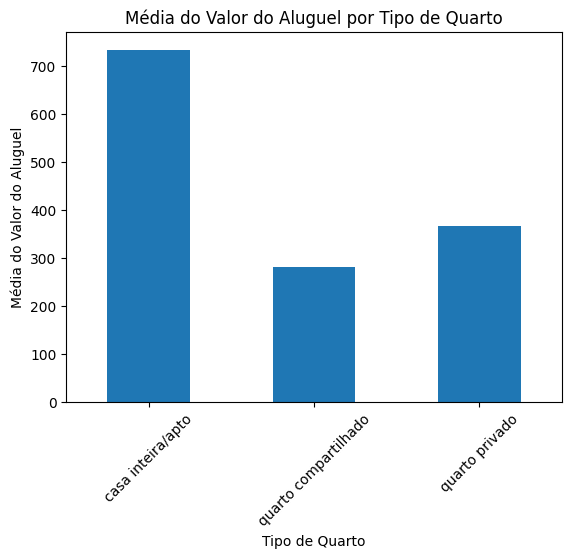

In [47]:
# Gráfico de barras do tipo de quarto vs. valor do aluguel médio
media_aluguel_por_tipo = df.groupby('tipo_quarto')['valor_aluguel'].mean()
media_aluguel_por_tipo.plot(kind='bar')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Média do Valor do Aluguel')
plt.title('Média do Valor do Aluguel por Tipo de Quarto')
plt.xticks(rotation=45)
plt.show()


<Axes: title={'center': 'valor_aluguel'}, xlabel='tipo_quarto'>

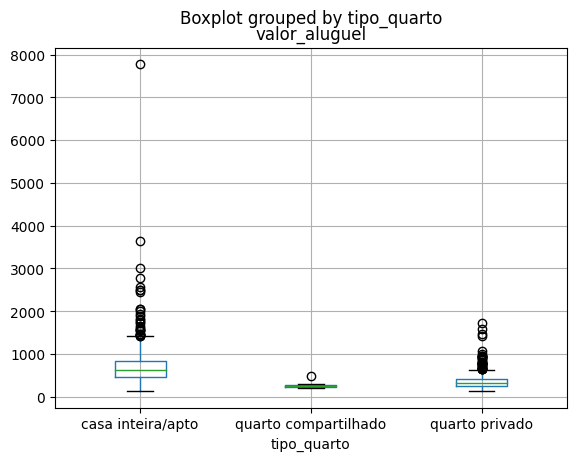

In [48]:
# Boxplot do valor do aluguel por tipo de quarto
df.boxplot(column='valor_aluguel', by='tipo_quarto')


<Axes: ylabel='Frequency'>

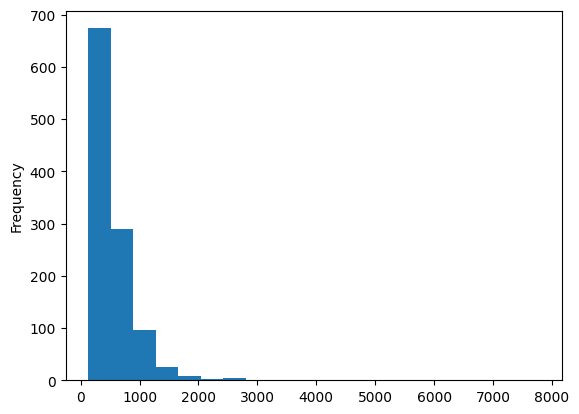

In [49]:
# Histograma da distribuição de valores do aluguel
df['valor_aluguel'].plot.hist(bins=20)


<ipython-input-50-306b75286094>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


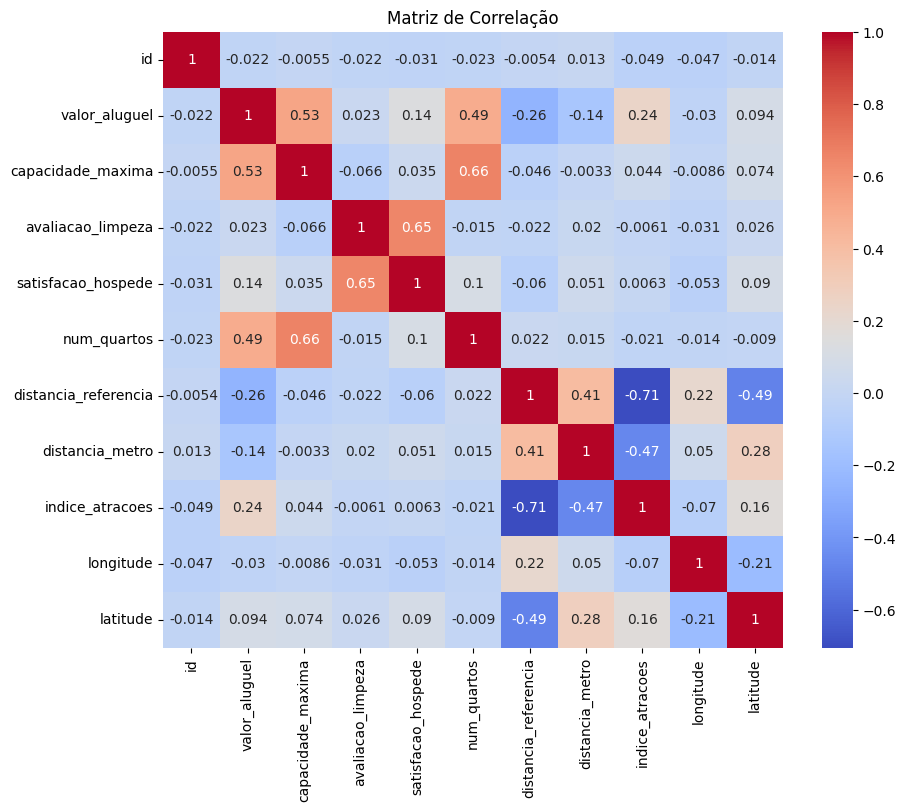

In [50]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


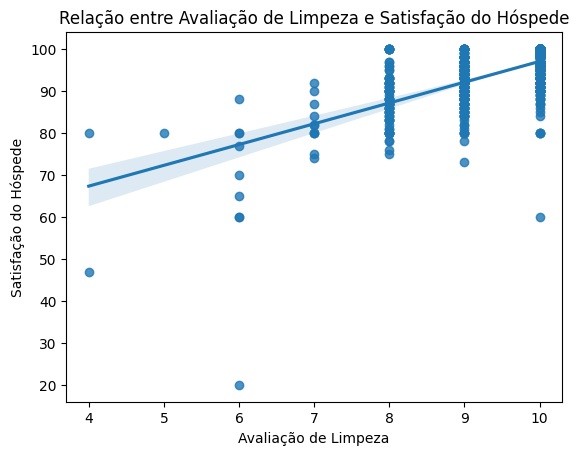

In [51]:
# Gráfico de dispersão da relação entre avaliação de limpeza e satisfação do hóspede
sns.regplot(x='avaliacao_limpeza', y='satisfacao_hospede', data=df_selecionado)
plt.xlabel('Avaliação de Limpeza')
plt.ylabel('Satisfação do Hóspede')
plt.title('Relação entre Avaliação de Limpeza e Satisfação do Hóspede')
plt.show()

# Análise SWOT

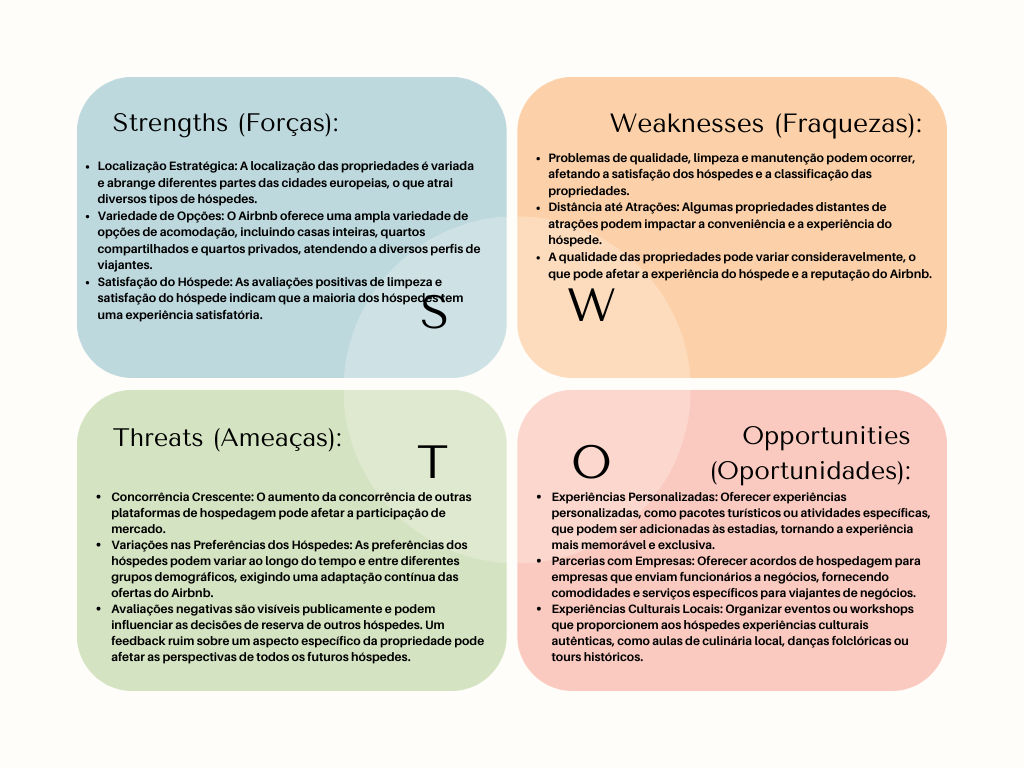


# Conclusão

Experiência do Hóspede: A relação positiva entre a
avaliação de limpeza e a satisfação do hóspede ressalta a importância de manter padrões elevados de limpeza e cuidado das propriedades. Uma boa avaliação de limpeza está associada a níveis mais altos de satisfação do hóspede.

Localização Estratégica: A correlação negativa entre a distância para pontos de referência, distância para o metrô e o índice de atrações sugere que propriedades mais próximas de atrações populares e meios de transporte têm maior atratividade para os hóspedes. A proximidade com esses pontos pode ser um diferencial na determinação dos preços e na demanda pelas propriedades.


Essas conclusões têm implicações significativas para o Airbnb e suas estratégias de negócios. Ao enfatizar a importância de manter a limpeza e oferecer propriedades espaçosas, o Airbnb pode aumentar a satisfação dos hóspedes e, consequentemente, sua fidelização. Além disso, considerar a localização e sua influência nos preços pode permitir que o Airbnb otimize suas ofertas em regiões estratégicas.




